# Image classification Cats vs Dog



In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import sys
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
from IPython.display import display, HTML

from PIL import Image
sys.modules["Image"] = Image

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

print(PATH)

68608000/68606236 [==============================] - 56s 1us/step
/Users/eikitakeuchi/.keras/datasets/cats_and_dogs_filtered


In [3]:
train_dir = os.path.join(PATH, "train")
validation_dir = os.path.join(PATH, "validation")

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [4]:
# Understanding dataset. 
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [5]:
# Set up parameters that will be used in the below codes. 
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

tf.keras.preprocessing.image.ImageDataGenerator is a class that is used to load training and validation data from the local disk. 

[tf.kera.preprocessing.image.ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

In [6]:
# Load dataset from the local disk.
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

flow_from_directory() can load all data in the directory. 

[flow_from_directory](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory)

In [7]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


If you have an error when execute next(), please install Pillow and import the module like below. 

import sys
from PIL import Image
sys.modules["Image"] = Image

In [8]:
sample_training_images, _ = next(train_data_gen)

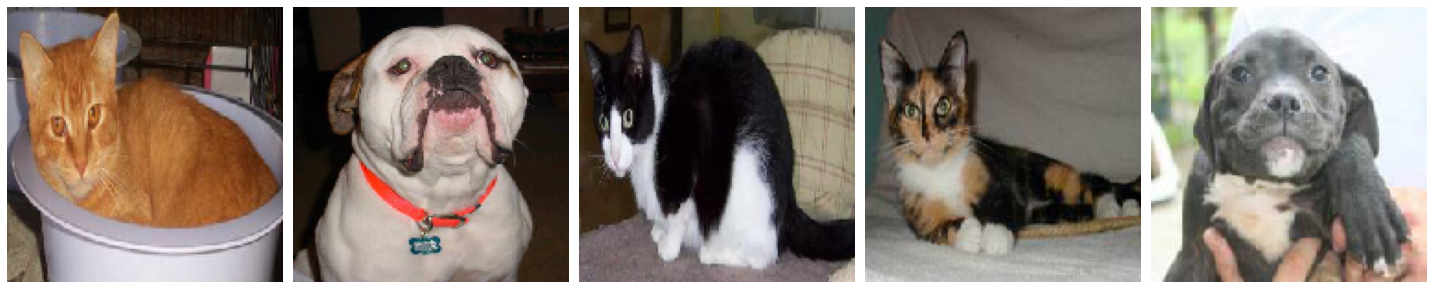

In [9]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
plotImages(sample_training_images[:5])

In [13]:
# Create the image classification model. 
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

# Configure the model.
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Show summary of the model. 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20736)            

In [11]:
# fit_generator() is to train the model. 
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
15/15 [==============================] - 37s 2s/step - loss: 0.8190 - accuracy: 0.4829 - val_loss: 0.6923 - val_accuracy: 0.5011
Epoch 2/15
15/15 [==============================] - 45s 3s/step - loss: 0.6927 - accuracy: 0.5005 - val_loss: 0.6902 - val_accuracy: 0.4989
Epoch 3/15
15/15 [==============================] - 36s 2s/step - loss: 0.6875 - accuracy: 0.5064 - val_loss: 0.6759 - val_accuracy: 0.5056
Epoch 4/15
15/15 [==============================] - 35s 2s/step - loss: 0.6581 - accuracy: 0.5719 - val_loss: 0.6629 - val_accuracy: 0.5357
Epoch 5/15
15/15 [==============================] - 42s 3s/step - loss: 0.6345 - accuracy: 0.5964 - val_loss: 0.6039 - val_accuracy: 0.6708
Epoch 6/15
15/15 [==============================] - 37s 2s/step - loss: 0.6103 - accuracy: 0.6389 - val_loss: 0.6278 - val_accuracy: 0.6607
Epoch 7/15
15/15 [==============================] - 36s 2s/step - loss: 0.5530 - acc

,accuray,val_accuray
0,0.482906,0.501116
1,0.500534,0.498884
2,0.506410,0.505580
3,0.571875,0.535714
4,0.596354,0.670759
5,0.638889,0.660714
6,0.700321,0.680804
7,0.743056,0.710938
8,0.767628,0.723214
9,0.768162,0.715402


,loss,val_loss
0,0.818972,0.692343
1,0.692726,0.690202
2,0.687488,0.675868
3,0.658060,0.662886
4,0.634485,0.603864
5,0.610261,0.627784
6,0.553027,0.586467
7,0.494546,0.556476
8,0.459170,0.607650
9,0.443824,0.552846


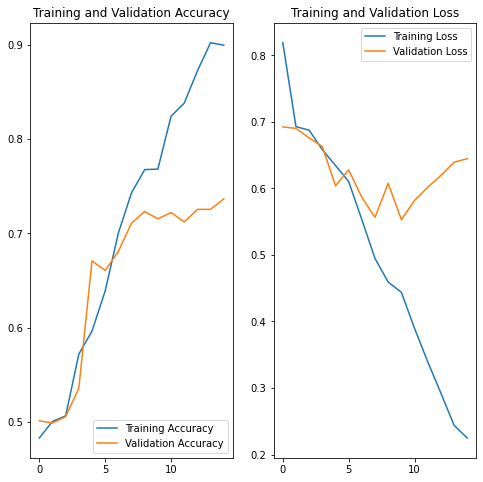

In [12]:
# Get accuracy.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

acc_df = pd.DataFrame({"accuray": acc, "val_accuray": val_acc})
display(acc_df)

# Get loss.
loss=history.history['loss']
val_loss=history.history['val_loss']

loss_df = pd.DataFrame({"loss": loss, "val_loss": val_loss})
display(loss_df)

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()